# Assignment 2


*Please fill out the relevant cells below according to the instructions. When done, save the notebook and export it to PDF or HTML, upload both to Canvas. For handwritten or other submissions, convert to PDF and upload the resulting document to Canvas.*

## Group Members

*Group submission with up to 3 students is highly encouraged. If you submit as part of group, list all group members with their contributions to this assignment, e.g.*

* Mark Forese (Solved Problem 1, Debugged Problem 2, Collaborated with Shai on Problem 3)
* Shai Slav (Checked Problem 1, Solved Problem 2, Collaborated with Mark on Problem 3)

---

## Problem 1: Seeing vs Diffraction Limit (3pts)

We perform observations in the $R$-band ($\lambda\approx650\,\mathrm{nm}$) with the Blanco telescope in Chile (4-meter diameter). The site has a typical seeing with a [FWHM](https://en.wikipedia.org/wiki/Full_width_at_half_maximum) $\theta_{s}=0.85\,\mathrm{arcsec}$. Compute the FWHM of the Airy disc $\theta_d\approx \lambda/D$, and compute the FWHM of the PSF by adding the two widths in quadrature. 

1. Our CCD camera has a pixel size $y=15\,\mu\mathrm{m}$. What focal length is needed to map the PSF FWHM onto 3 pixels?
2. Our camera has 62 chips with 2048 x 4096 pixels. How much area on the sky (in square degrees) does it cover?
3. How would the answers to 1. and 2. change if the telescope operates at the diffraction limit?

In [1]:
import numpy as np
import astropy.units as u
import sympy

wavelength = 650 * u.nm
theta_seeing = 0.85 * u.arcsec
diam = 4 * u.m

* We approximation the diffraction limit as given above:

$$\theta_{d} \approx \lambda / D$$

In [2]:
theta_diffraction = (wavelength / diam).to(u.dimensionless_unscaled) *u.radian
theta_diffraction_arcsec = theta_diffraction.to(u.arcsec)
print(u'The FWHM of the Airy disk is 𝜃_d = {:.3}'.format(theta_diffraction_arcsec))
print(theta_diffraction)

The FWHM of the Airy disk is 𝜃_d = 0.0335 arcsec
1.625e-07 rad


To get the total PSF FWHM, we add the two angles in quadrature, i.e.:

$$\theta_{PSF} = \sqrt{\theta_{s}^2 + \theta_{d}^2}$$

In [3]:
theta_PSF = np.sqrt(theta_seeing**2 + theta_diffraction_arcsec**2)
print('The total PSF FWHM 𝜃_psf = {:.3f}'.format(theta_PSF))

The total PSF FWHM 𝜃_psf = 0.851 arcsec


As we can see, the total PSF is dominated by atmospheric seeing.

To get the focal length needed for a PSF on only 3 pixels of this size, we need to use the equation:

$$s = \frac{\theta}{y} = \frac{1}{f} \;\;\;\;\theta\text{ in radians}$$

where s is the image scale, f is the focal length, $\theta$ is the angle on the sky, and y is the distance on the focal plane corresponding to that angle (aka pixel size) (provided a ray of light goes through the center of the lens).

In our case, we set $\theta$ = $\theta_{PSF}$, y = 15 $\mu m$, and we solve for f.

$$f = \frac{y}{\theta}$$

This gives the focal length required to map our $\theta_{PSF}$ to 1 pixel. To go to three pixels, we multipy y by 3

$$f_{\text{three pix}} = \frac{3 \, y}{\theta}$$

In [4]:
y = 15 *u.micron

f_three_pix = 3*y / (theta_PSF.to(u.radian)) #in microns / radians

f_three_pix_meters = f_three_pix.to(u.m/u.radian).value*u.m
print('The required focal length to map this PSF to 3 pixels (45 microns) is f = {:.1f}'.format(f_three_pix_meters))

The required focal length to map this PSF to 3 pixels (45 microns) is f = 10.9 m


To get the angular size, we take the image scale from the last part and multipy by the pixel scale (y in this problem) to get the pixel scale (angular size on the sky mapped by one pixel)

$$s_p = sy = \frac{\theta_{PSF}}{3 y}\, y = \frac{\theta_{PSF}}{3} \text{ [angle / pixel] }$$

In [5]:
pixel_scale = theta_PSF.to(u.radian)/3
print('So each pixel corresponds to {:.3e} on the sky, or {:.3f}'.format(pixel_scale, pixel_scale.to(u.arcsec)))
image_width = 2048*pixel_scale
image_length = 4096*pixel_scale

field_of_view = image_width*image_length

print('\n The total FOV of this camera is {:.2f}'.format(field_of_view.to(u.degree**2)))

So each pixel corresponds to 1.375e-06 rad on the sky, or 0.284 arcsec

 The total FOV of this camera is 0.05 deg2


If the telescope is diffraction limited, then:

$$\theta_{PSF} \rightarrow \theta_d = 0.0335 \text{ arcsec } = 1.625 x 10^{-7} \text{ radians }$$

Nothing else changes about the methods.

In [6]:
f_three_pix_difLim = (3*y / (theta_diffraction.to(u.radian))).value * u.micron
print('The focal length to map the diffraction limited PSF to 3 pixels (45 microns) is f = {:.3e}'.format(f_three_pix_difLim.to(u.m)))
pixel_scale_diffLim = theta_diffraction.to(u.radian)/3
print('So each pixel corresponds to {:.3e} on the sky, or {:.3f}'.format(pixel_scale, pixel_scale.to(u.arcsec)))

image_width_diffLim = 2048*pixel_scale_diffLim
image_length_diffLim = 4096*pixel_scale_diffLim

field_of_view_diffLim = image_width_diffLim*image_length_diffLim
print('\n Total FOV of this camera while diffraction limited {:.6f}'.format(field_of_view_diffLim.to(u.degree*u.degree)))

The focal length to map the diffraction limited PSF to 3 pixels (45 microns) is f = 2.769e+02 m
So each pixel corresponds to 1.375e-06 rad on the sky, or 0.284 arcsec

 Total FOV of this camera while diffraction limited 0.000081 deg2


**So, while the diffraction limited camera has a more fine resolution, it has a larger focal length and smaller field of view.**

## Problem 2: Adaptive Optics (3pts)

The AO system on the Keck telescopes on Maunakea in Hawai'i has a mirror diameter of 10 meters. It uses a Shack-Hartmann sensor with a 100 x 100 lenslet array and a laser guide star that radiates at the Sodium line ($\lambda=589\,\mathrm{nm}$). What is the [AB magnitude](https://en.wikipedia.org/wiki/AB_magnitude) for monochromatic light so that every lenslet array element receives 100 photons from the artificial guide star for an exposure time of 0.5 milli-second?

Use `astropy.units` (which defines the unit Jansky as `u.Jy`) and `astropy.constants` to make sure that you have correct units.

We know the AB magnitude is given by:

$$m = -2.5 \log\left(\frac{Flux}{3631 \, J_y}\right)$$

the energy of a photon is given by:

$$E_\gamma = \frac{h \, c}{\lambda} = h \nu$$

where h is Planck's constant, c is the speed of light, and $\lambda$ is the wavelength

In [7]:
import astropy.constants as const

keck_diam = 10 * u.m
sensor_array_size = (100,100)
num_lenslets = (sensor_array_size[0]*sensor_array_size[1])
lambda_sodium = 589 * u.nm
num_photons_per_lenslet = 100
exposure_time = 0.5*u.ms

primary_area = np.pi*keck_diam**2/4
total_num_photons = num_lenslets*num_photons_per_lenslet


photon_energy = const.h*const.c/lambda_sodium
photon_frequency = (photon_energy / const.h).to(u.Hz)

total_flux = total_num_photons*photon_energy / (exposure_time*primary_area * photon_frequency) 
total_flux_janskys = total_flux.to(u.Jy)

magnitude = -2.5*np.log10(total_flux_janskys.value/3631) * u.mag

print('The AB magnitude of this artificial guide star is m = {:.2f}'.format(magnitude))

The AB magnitude of this artificial guide star is m = 8.33 mag


## Problem 3: Image Formation (4pts)

Define the two-dimensional Gaussian function $G(x,y,\sigma,x_0,y_0)$, where $\sigma$ denotes the width and $(x_0, y_0)$ the center location, as the product $G(x,y,\sigma,x_0,y_0) = g(x-x_0,\sigma)\cdot g(y-y_0,\sigma)$, with $g$ given by the one-dimensional [Gaussian function](https://en.wikipedia.org/wiki/Normal_distribution).

Let's make an image from this function.

### First attempt

Evaluate $G(x,y)$ with $\sigma=\tfrac{1}{2}$, $x_0=y_0=0$ for a grid of points from -5 to 5 with stepsize $\Delta=1$. Plot the grid values as an image with `matplotlib.imshow`. Compute the flux by summing over the grid values.

Repeat the steps for $(x_0=0.5, y_0=0)$, $(x_0=0, y_0=0.5)$, and $(x_0=0.5, y_0=0.5)$. What do you find?
Can you determine what values for $(x_0, y_0)$ give the most inaccurate flux measurement?

**Hint:** For visualizing the faint tails of the function it helps to plot the logarithm of $G$.

In [9]:
def oneD_gaussian(x, x_0, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))* np.exp(-0.5*((x-x_0)/sigma)**2)

def twoD_gaussian(x,x_0,y,y_0,sigma):
    gaussians = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            gaussians[i][j] = oneD_gaussian(x[i],x_0,sigma)*oneD_gaussian(y[j],y_0,sigma)
            
    return gaussians

The flux for Case 1 is 1.028974
The flux for Case 2 is 0.999793
The flux for Case 3 is 0.999793
The flux for Case 4 is 0.971439


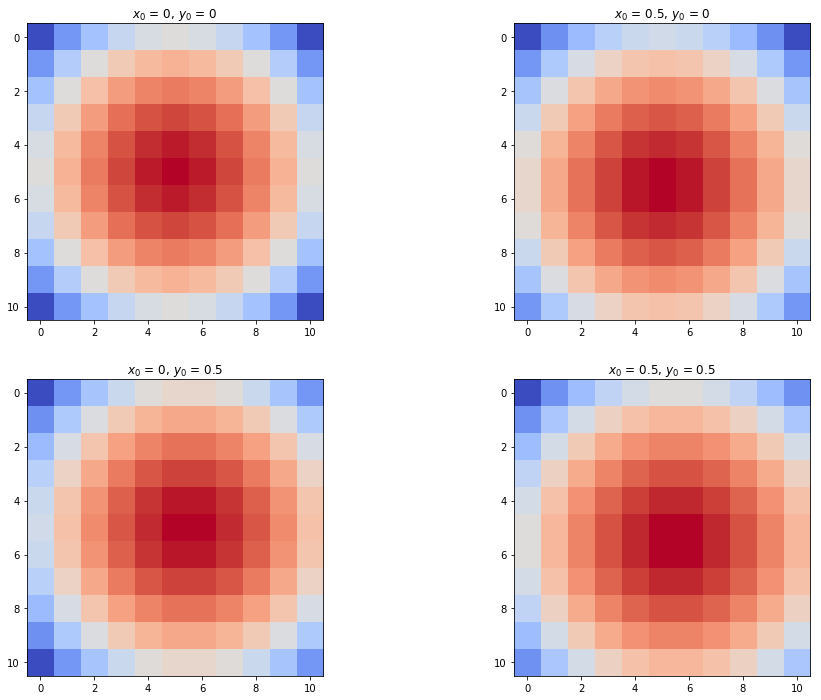

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#case 1
x_0_1 = 0
y_0_1 = 0 
sigma = 1.0/2
stepsize = 1
x = np.arange(start = -5,stop = 6,step = stepsize)
y = np.arange(start = -5,stop = 6,step = stepsize)

fig = plt.figure(figsize = (16,12))

ax = plt.subplot(221)
big_G_case1 = twoD_gaussian(x,x_0_1,y,y_0_1,sigma)
plt.imshow(np.log(big_G_case1),cmap = 'coolwarm')
ax.set_title(r'$x_0$ = 0, $y_0$ = 0')

flux_case_1 = np.sum(big_G_case1)

#case 2 
x_0_2 = 0.5
y_0_2 = 0

ax = plt.subplot(222)
big_G_case2 = twoD_gaussian(x, x_0_2, y, y_0_2, sigma)
plt.imshow(np.log(big_G_case2),cmap = 'coolwarm')
ax.set_title(r'$x_0$ = 0.5, $y_0$ = 0')

flux_case_2 = np.sum(big_G_case2)

#case 3
x_0_3 = 0
y_0_3 = 0.5

ax = plt.subplot(223)
big_G_case3 = twoD_gaussian(x,x_0_3,y,y_0_3,sigma)
plt.imshow(np.log(big_G_case3),cmap = 'coolwarm')
ax.set_title(r'$x_0$ = 0, $y_0$ = 0.5')

flux_case_3 = np.sum(big_G_case3)

#case 4
x_0_4 = 0.5
y_0_4 = 0.5

ax = plt.subplot(224)
big_G_case4 = twoD_gaussian(x, x_0_4, y, y_0_4,sigma)
plt.imshow(np.log(big_G_case4),cmap = 'coolwarm')
ax.set_title(r'$x_0$ = 0.5, $y_0$ = 0.5')

flux_case_4 = np.sum(big_G_case4)

fluxes = [flux_case_1,flux_case_2,flux_case_3,flux_case_4]
for i in range(4):
    print('The flux for Case {} is {:3f}'.format(i+1,fluxes[i]))

If we integrate a (normalized) Gaussian, we would expect the total flux to be 1. **So, the most innacurate flux measurement above is for case 1, where we have flux = 1.028974.** Case 4 is also around the same innacuracy, as it is off by 0.028561.

### Second attempt

Function and grid does not image make! 

For proper mathematical treatment, we first have to integrate the function over the shape of the pixel, and then evaluate over the pixel grid. The pixel-integrated function of a Gaussian in 1D has the following analytic form:

$$
g_p(x,\sigma) = \frac{1}{2}\left[\mathrm{erf}\left(\frac{\Delta/2 - x}{\sqrt{2} \sigma}\right) + \mathrm{erf}\left(\frac{x + \Delta/2}{\sqrt{2} \sigma}\right)\right]
$$

The function $\mathrm{erf}$ is called the ["Error function"](https://en.wikipedia.org/wiki/Error_function) and implemented in the package `scipy` as `scipy.special.erf`.

Gladly, the product rule still applies here (but only because both the Gaussian _and_ the shape of a square pixel follow that rule), so that the two-dimensional form $G_p$ can still be obtained from the product of the one-dimensional functions $g_p$ as above.

Evaluate $G_p$ on the same grid and with the same 4 reference positions for $(x_0, y_0)$, plot the images, and compute the flux for each image.

In [14]:
from scipy.special import erf as erf

def gaussian_pixel_integrated_oneD(x,x_0,stepsize,sigma):
    x -= x_0
    gauss = 0.5*(erf((stepsize/2 - x)/(np.sqrt(2)*sigma)) + erf((stepsize/2 + x)/(np.sqrt(2)*sigma)))
    return gauss


def double_gauss(x, x_0, y, y_0, stepsize,sigma):
    gaussians = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            gaussians[i][j] = gaussian_pixel_integrated_oneD(x[i],x_0,stepsize,sigma)\
            * gaussian_pixel_integrated_oneD(y[j], y_0, stepsize,sigma)
    return gaussians

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log


The flux for Integrated Case 1 is 0.9999999999999999
The flux for Integrated Case 2 is 1.0
The flux for Integrated Case 3 is 1.0
The flux for Integrated Case 4 is 0.9999999999999998


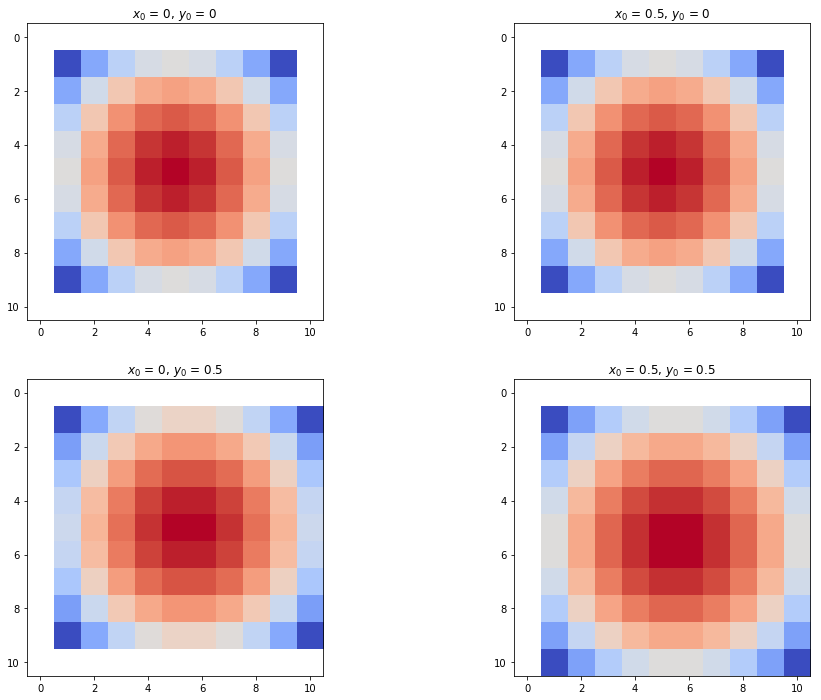

In [15]:
fig = plt.figure(figsize = (16,12))

#case 1
integrated_G_case1 = double_gauss(x,x_0_1,y,y_0_1,stepsize,sigma)
ax = plt.subplot(221)
ax.set_title(r'$x_0$ = 0, $y_0$ = 0')
#ax.axis('off')
plt.imshow(np.log(integrated_G_case1),cmap = 'coolwarm')


#case 2
integrated_G_case2 = double_gauss(x,x_0_2,y,y_0_2,stepsize,sigma)
ax = plt.subplot(222)
ax.set_title(r'$x_0$ = 0.5, $y_0$ = 0')
#ax.axis('off')

plt.imshow(np.log(integrated_G_case1),cmap = 'coolwarm')

#case 3
integrated_G_case3 = double_gauss(x,x_0_3,y,y_0_3,stepsize,sigma)
ax = plt.subplot(223)
ax.set_title(r'$x_0$ = 0, $y_0$ = 0.5')
#ax.axis('off')

plt.imshow(np.log(integrated_G_case3),cmap = 'coolwarm')

#case 4
integrated_G_case4 = double_gauss(x,x_0_4,y,y_0_4,stepsize,sigma)
ax = plt.subplot(224)
ax.set_title(r'$x_0$ = 0.5, $y_0$ = 0.5')
#ax.axis('off')

plt.imshow(np.log(integrated_G_case4),cmap = 'coolwarm')


integrated_gaussians = [integrated_G_case1,integrated_G_case2,integrated_G_case3,integrated_G_case4]
integrated_fluxes = []
for i in range(len(integrated_gaussians)):
    integrated_fluxes.append(np.sum(integrated_gaussians[i]))
    print('The flux for Integrated Case {} is {}'.format(i+1,integrated_fluxes[i]))

As we can see, these fluxed are *much* closer to 1, and are therefore much more accurate.